In [ ]:
# Initialize the random number generator
import random
random.seed(0)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#Opening the file as read only
import h5py
h5f=h5py.File('/content/drive/My Drive/Database/SVHN_single_grey1.h5','r')

In [ ]:
h5f.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [ ]:
# Load the training, test and validation set

X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]

In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
X_train

array([[[ 33.0704,  30.2601,  26.852 , ...,  71.4471,  58.2204,
          42.9939],
        [ 25.2283,  25.5533,  29.9765, ..., 113.0209, 103.3639,
          84.2949],
        [ 26.2775,  22.6137,  40.4763, ..., 113.3028, 121.775 ,
         115.4228],
        ...,
        [ 28.5502,  36.212 ,  45.0801, ...,  24.1359,  25.0927,
          26.0603],
        [ 38.4352,  26.4733,  23.2717, ...,  28.1094,  29.4683,
          30.0661],
        [ 50.2984,  26.0773,  24.0389, ...,  49.6682,  50.853 ,
          53.0377]],

       [[ 86.9591,  87.0685,  88.3735, ...,  91.8014,  89.7477,
          92.5302],
        [ 86.688 ,  86.9114,  87.4337, ...,  90.7306,  87.204 ,
          88.5629],
        [ 85.9654,  85.8145,  85.9239, ...,  63.8626,  59.8199,
          54.8805],
        ...,
        [ 90.2236,  91.0448,  93.4637, ...,  55.3535,  48.5822,
          44.0557],
        [ 90.6427,  90.4039,  90.937 , ...,  78.2696,  77.4977,
          74.27  ],
        [ 88.0236,  88.1977,  86.6709, ...,  75.

In [ ]:
X_train.shape

(42000, 32, 32)

In [ ]:
X_test.shape

(18000, 32, 32)

We see the train test split is in 70:30 ratio. Out of the 60000 records, 70%(42000 records) of the data is given for training and remaining 30% (18000 records) contribute test set

In [ ]:
type(y_train)

numpy.ndarray

In [ ]:
y_train

array([2, 6, 7, ..., 7, 0, 4], dtype=uint8)

In [ ]:
import numpy as np
np.unique(y_train, return_index=False, return_inverse=False, return_counts=False, axis=None)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

Labels denote the digits 1 to 10, For example Label '2' for digit 2 and '10' for digit 0. and hence has 10 classes. The features include the values of 32-by-32 images centered for each single character in the labels(0,1,2,3,4,5,6,7,8,9)

In [ ]:
np.unique(y_test, return_index=False, return_inverse=False, return_counts=False, axis=None)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
type(X_test)

numpy.ndarray

In [ ]:
type(y_test)

numpy.ndarray

In [ ]:
# Reshape and normalize the input data
import tensorflow as tf
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32)))
model.add(tf.keras.layers.BatchNormalization())

In [ ]:
#One hot encoding the labels for train and test data
# Since there are 10 numbers in the labels(0 to 9), we give the number of classes as 10
y_train = tf.keras.utils.to_categorical(y_train,num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test,num_classes=10)

In [ ]:
#Flattening following by addition of Dense layers(Relu and Softmax)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(200, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [ ]:
#Compiling the model with loss as Categorical Cross Entropy and Adam optimizers
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
#Fitting the model
model.fit(X_train, y_train, validation_data=(X_test,y_test),epochs=10,batch_size=30)

Epoch 1/10
1400/1400 [==============================] - 6s 4ms/step - loss: 0.6192 - accuracy: 0.8104 - val_loss: 0.6123 - val_accuracy: 0.8337
Epoch 2/10
1400/1400 [==============================] - 7s 5ms/step - loss: 0.5986 - accuracy: 0.8173 - val_loss: 0.6163 - val_accuracy: 0.8324
Epoch 3/10
1400/1400 [==============================] - 7s 5ms/step - loss: 0.5830 - accuracy: 0.8221 - val_loss: 0.5888 - val_accuracy: 0.8415
Epoch 4/10
1400/1400 [==============================] - 7s 5ms/step - loss: 0.5678 - accuracy: 0.8280 - val_loss: 0.6105 - val_accuracy: 0.8379
Epoch 5/10
1400/1400 [==============================] - 7s 5ms/step - loss: 0.5596 - accuracy: 0.8297 - val_loss: 0.5788 - val_accuracy: 0.8476
Epoch 6/10
1400/1400 [==============================] - 6s 4ms/step - loss: 0.5472 - accuracy: 0.8347 - val_loss: 0.5703 - val_accuracy: 0.8480
Epoch 7/10
1400/1400 [==============================] - 6s 5ms/step - loss: 0.5398 - accuracy: 0.8354 - val_loss: 0.6131 - val_accuracy:

In [ ]:
test_loss,test_acc = model.evaluate(X_test,y_test)

563/563 [==============================] - 1s 2ms/step - loss: 0.6194 - accuracy: 0.8366


In [ ]:
print('\nTest accuracy', test_acc)
print('\nLoss of the test data', test_loss)


Test accuracy 0.8366110920906067

Loss of the test data 0.619357168674469


In [ ]:
predictions = model.predict(X_test)

In [ ]:
predictions[1]

array([1.85563962e-07, 1.67714155e-04, 1.41026393e-01, 8.30944657e-07,
       3.79057461e-08, 1.31582851e-06, 4.48808605e-05, 8.58730912e-01,
       1.18497546e-07, 2.75745060e-05], dtype=float32)

In [ ]:
np.argmax(predictions[1])

7

In [ ]:
y_test[1]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

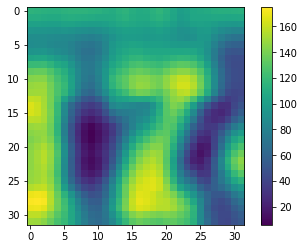

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(X_test[1])
plt.colorbar()
plt.grid(False)
plt.show()

We see 7 is predicted correctly based on the image